# RNN, Time Series, Sequence Data

This notebook is introduction into Recurrent Neural Networks, Time Series and Sequence Data and is splitted into several theoretical and coding parts.

_____________

## Theory Part I

<div class="alert alert-block alert-warning"><b>Theory basics</b></div>

*Most common sequence data are: text, speech, financial data, weather, passangers traffic etc. These data are very tough to predict, more in the future we are trying to make a prediction, the more difficult it would be.*

**Shape of a sequence**

N (number of samples) x T (time steps in the sequence) x D (number of features)

**Length of sequences**

*TensorFlow does not support different length of sequences, so the longest sequence is default and all which are shorter are filled in with zeros.*

**Horizon**

*Horizon is the number of future steps we want to predict.*

<div class="alert alert-block alert-warning"><b>Linear regression and forecasting</b></div>

*First step in forecasting is the simplest one, linear regression. Our data are NxTxD and LR only works with NxT, but if our D is only 1, we just flatten NxTx1 to NxT.*

![\begin{equation*}
\ \hat{x}_t = w_0+w_1x_{t-1}+w_2x_{t-2}+w_3x_{t-3}
\end{equation*}](https://render.githubusercontent.com/render/math?math=%5Chuge+%5Ctextstyle+%5Cbegin%7Bequation%2A%7D%0A%5C+%5Chat%7Bx%7D_t+%3D+w_0%2Bw_1x_%7Bt-1%7D%2Bw_2x_%7Bt-2%7D%2Bw_3x_%7Bt-3%7D%0A%5Cend%7Bequation%2A%7D)

*Autoregressive equation for Linear Regression, t-1 etc are backwards steps in our time series. But this can calculate just one value, one stock price, whether for one day. How to predict multiple values?* 

<p style="background:black">
<code style="background:black;color:white">We make multiple predictions, but we have to use predicted values to predict new ones.
</code>
</p>

![\begin{equation*}
\ \hat{x_4} = w_0+w_1x_3+w_2x_2+w_3x_1
\end{equation*}](https://render.githubusercontent.com/render/math?math=%5Chuge+%5Ctextstyle+%5Cbegin%7Bequation%2A%7D%0A%5C+%5Chat%7Bx_4%7D+%3D+w_0%2Bw_1x_3%2Bw_2x_2%2Bw_3x_1%0A%5Cend%7Bequation%2A%7D)

![\begin{equation*}
\ \hat{x_5} = w_0+w_1x_4+w_2x_3+w_3x_2
\end{equation*}](https://render.githubusercontent.com/render/math?math=%5Chuge+%5Ctextstyle+%5Cbegin%7Bequation%2A%7D%0A%5C+%5Chat%7Bx_5%7D+%3D+w_0%2Bw_1x_4%2Bw_2x_3%2Bw_3x_2%0A%5Cend%7Bequation%2A%7D)

![\begin{equation*}
\ \hat{x_6} = w_0+w_1x_5+w_2x_4+w_3x_3
\end{equation*}](https://render.githubusercontent.com/render/math?math=%5Chuge+%5Ctextstyle+%5Cbegin%7Bequation%2A%7D%0A%5C+%5Chat%7Bx_6%7D+%3D+w_0%2Bw_1x_5%2Bw_2x_4%2Bw_3x_3%0A%5Cend%7Bequation%2A%7D)

*Therefore our prediction in TF cannot be done only by mode.predict, but we has to use a for loop, meaning - add new predicted value - predict - discard old one etc..Finally we are not limited with just linear regression we can just add layer and use more powerfull model*

## Coding Part I

<div class="alert alert-block alert-warning"><b>Sipmple Linear Regression</b></div>

<p style="background:black">
<code style="background:black;color:white">Dependencies
</code>
</p>

In [2]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<p style="background:black">
<code style="background:black;color:white">Random data
</code>
</p>

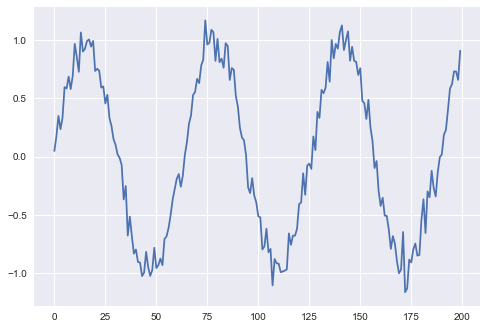

In [81]:
plt.style.use('seaborn')
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1
plt.plot(series)

<p style="background:black">
<code style="background:black;color:white">Creating data set
</code>
</p>

In [82]:
T, X, Y = 10, [], []

for t in range(len(series) - T): #200-10 = 190
    x = series[t:t+T] #1:11, 2:12 etc..190-200
    X.append(x) #always appending 10 values ..
    y = series[t+T] #labels
    Y.append(y)

In [83]:
len(X), len(Y)

(190, 190)

*So I just created X which has 190x10 values and Y which has 190x1 values.*

In [84]:
X = np.array(X).reshape(-1, T) #just reshape to 10 "columns"
Y = np.array(Y) #just an array
N = len(X)

In [85]:
X.shape, Y.shape, N

((190, 10), (190,), 190)

<p style="background:black">
<code style="background:black;color:white">Autoregressive linear model
</code>
</p>

In [86]:
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i,x)

model.compile(loss="mse", optimizer=Adam(lr=0.1))

<p style="background:black">
<code style="background:black;color:white">Train our RNN
</code>
</p>

In [87]:
result = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs = 80,
    validation_data=(X[-N//2:], Y[-N//2:]),
    #:-N//2 and :-N//2: is just Train/Test split
)

Train on 95 samples, validate on 95 samples
Epoch 1/80
95/95 [==============================] - 2s 17ms/sample - loss: 0.2940 - val_loss: 0.1315
Epoch 2/80
95/95 [==============================] - 0s 210us/sample - loss: 0.1233 - val_loss: 0.0498
Epoch 3/80
95/95 [==============================] - 0s 577us/sample - loss: 0.0466 - val_loss: 0.0754
Epoch 4/80
95/95 [==============================] - 0s 357us/sample - loss: 0.0526 - val_loss: 0.0557
Epoch 5/80
95/95 [==============================] - 0s 598us/sample - loss: 0.0618 - val_loss: 0.0602
Epoch 6/80
95/95 [==============================] - 0s 483us/sample - loss: 0.0504 - val_loss: 0.0595
Epoch 7/80
95/95 [==============================] - 0s 357us/sample - loss: 0.0491 - val_loss: 0.0425
Epoch 8/80
95/95 [==============================] - 0s 504us/sample - loss: 0.0358 - val_loss: 0.0373
Epoch 9/80
95/95 [==============================] - 0s 493us/sample - loss: 0.0280 - val_loss: 0.0400
Epoch 10/80
95/95 [====================

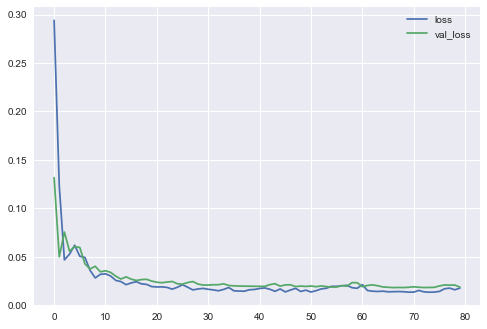

In [88]:
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label='val_loss')
plt.legend()

*So our model is trainder, let's proceed with prediction.*

<p style="background:black">
<code style="background:black;color:white">Prediction of future values
</code>
</p>

In [89]:
validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar
    
    # update the predictions list
    validation_predictions.append(p)
    
    # make the new input
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

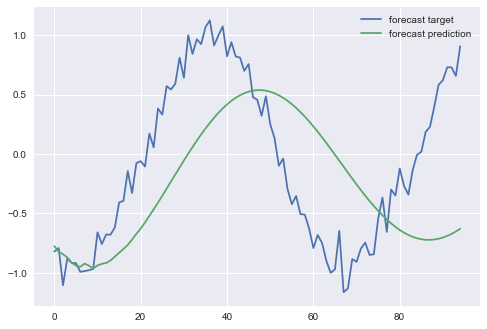

In [90]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

*So we have nice plot, I mean even EMA or some other weighted average would done a same or better job :). But it is not a point here. Most important for now is just syntax above.*

<div class="alert alert-block alert-danger"><b>BeAware:</b> last code is not crystal clear , so I will go back and improve it</div>

## Theory Part II

<div class="alert alert-block alert-warning"><b>Recurrent neural network</b></div>

*The basic idea is same as in simple Linear Regression, our hidden layer need to use its own values, so the hidden feature depends on previous hidden feature. And as always, the picture explains it best.*

![Loss](images\dl23.png)

![\begin{equation*}
\ \ h_t= \sigma(W_{xh}^TX_t + W_{hh}^Th_{t-1}+b_h)
\end{equation*}](https://render.githubusercontent.com/render/math?math=%5Chuge+%5Ctextstyle+%5Cbegin%7Bequation%2A%7D%0A%5C+%5C+h_t%3D+%5Csigma%28W_%7Bxh%7D%5ETX_t+%2B+W_%7Bhh%7D%5ETh_%7Bt-1%7D%2Bb_h%29%0A%5Cend%7Bequation%2A%7D)

*It's our equation for hidden layer, simply put it uses time (t and t-1) and xh means that it's using input features to generate hidden layer outputs and then it uses it's own calculated values. Our final output equation is:*

![\begin{equation*}
\ \hat y_t = \sigma(W_o^Th_t+b_o)
\end{equation*}](https://render.githubusercontent.com/render/math?math=%5Chuge+%5Ctextstyle+%5Cbegin%7Bequation%2A%7D%0A%5C+%5Chat+y_t+%3D+%5Csigma%28W_o%5ETh_t%2Bb_o%29%0A%5Cend%7Bequation%2A%7D)

<div class="alert alert-block alert-danger"><b>BeAware:</b> RNN usually contains only one hidden layer</div>

*The following comparison nicely shows the difference between ANN and RNN.*

![Loss](images\dl24.png)

**Calculation steps**

![\begin{equation*}
\ Input-vectors: x_1, x_2...,x_T
\end{equation*}](https://render.githubusercontent.com/render/math?math=%5Chuge+%5Ctextstyle+%5Cbegin%7Bequation%2A%7D%0A%5C+Input-vectors%3A+x_1%2C+x_2...%2Cx_T%0A%5Cend%7Bequation%2A%7D)

![\begin{equation*}
\ Shape(x_t) = D
\end{equation*}](https://render.githubusercontent.com/render/math?math=%5Chuge+%5Ctextstyle+%5Cbegin%7Bequation%2A%7D%0A%5C+Shape%28x_t%29+%3D+D%0A%5Cend%7Bequation%2A%7D)

![\begin{equation*}
\ Step1: h_1=\sigma(W_{xh}^Tx_1+W_{hh}^Th_0+b_h)
\end{equation*}](https://render.githubusercontent.com/render/math?math=%5Chuge+%5Ctextstyle+%5Cbegin%7Bequation%2A%7D%0A%5C+Step1%3A+h_1%3D%5Csigma%28W_%7Bxh%7D%5ETx_1%2BW_%7Bhh%7D%5ETh_0%2Bb_h%29%0A%5Cend%7Bequation%2A%7D)

<div class="alert alert-block alert-danger"><b>BeAware:</b>h0 is initial hidden state, in TensorFlow in most cases just 0</div>

![\begin{equation*}
\ Step2: \hat y_1=\sigma(W_0^Th_1+b_0)
\end{equation*}](https://render.githubusercontent.com/render/math?math=%5Chuge+%5Ctextstyle+%5Cbegin%7Bequation%2A%7D%0A%5C+Step2%3A+%5Chat+y_1%3D%5Csigma%28W_0%5ETh_1%2Bb_0%29%0A%5Cend%7Bequation%2A%7D)

![\begin{equation*}
\ Step3: h_2=\sigma(W_{xh}^Tx_2+W_{hh}^Th_1+b_h)
\end{equation*}](https://render.githubusercontent.com/render/math?math=%5Chuge+%5Ctextstyle+%5Cbegin%7Bequation%2A%7D%0A%5C+Step3%3A+h_2%3D%5Csigma%28W_%7Bxh%7D%5ETx_2%2BW_%7Bhh%7D%5ETh_1%2Bb_h%29%0A%5Cend%7Bequation%2A%7D)

![\begin{equation*}
\ Step4: \hat y_2=\sigma(W_0^Th_2+b_0)
\end{equation*}](https://render.githubusercontent.com/render/math?math=%5Chuge+%5Ctextstyle+%5Cbegin%7Bequation%2A%7D%0A%5C+Step4%3A+%5Chat+y_2%3D%5Csigma%28W_0%5ETh_2%2Bb_0%29%0A%5Cend%7Bequation%2A%7D)

![\begin{equation*}
\ Step_T: h_T = ...,\hat y_T= ...
\end{equation*}](https://render.githubusercontent.com/render/math?math=%5Chuge+%5Ctextstyle+%5Cbegin%7Bequation%2A%7D%0A%5C+Step_T%3A+h_T+%3D+...%2C%5Chat+y_T%3D+...%0A%5Cend%7Bequation%2A%7D)

*Where y(hat) is temporary, it is discrading again and again.*

![Loss](images\dl26.png)

- h1 depends on h0 and x1
- y1 depends on h1 and indirectly on x1
- h2 depends on h1 and x2
- y2 depends on h2 and indirectly on x1, x2
- ....
- y3 depends on x1,x2,x3
- y4 depends on x1,x2,x3,x4
- Simply put: if our prediction will be failing from the begining, we would be using bad predictions for prediction :), therefore we are lowering chance to make a good prediction.

![\begin{equation*}
\ p(y_t=k|x_1,x_2,x_3,...,x_T)
\end{equation*}](https://render.githubusercontent.com/render/math?math=%5Chuge+%5Ctextstyle+%5Cbegin%7Bequation%2A%7D%0A%5C+p%28y_t%3Dk%7Cx_1%2Cx_2%2Cx_3%2C...%2Cx_T%29%0A%5Cend%7Bequation%2A%7D)

<div class="alert alert-block alert-info"><b>Note:</b> RNN is very strong in NLP, unlike conventional ml methods NLP with Deep learning is able to predict sequnce of words in sentence</div>

*Last things to mention, RNN uses also shared wights mainly due to computational complexity.*

## Coding Part II

<div class="alert alert-block alert-warning"><b>Simple RNN</b></div>

<p style="background:black">
<code style="background:black;color:white">Dependencies
</code>
</p>

In [94]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<p style="background:black">
<code style="background:black;color:white">Data
</code>
</p>

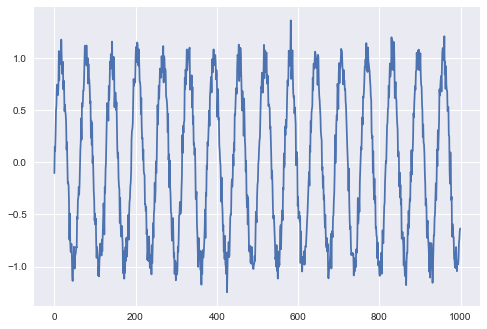

In [143]:
#same data as before
series = np.sin(0.1*np.arange(1000)) + np.random.randn(1000)*0.1
plt.plot(series)

In [144]:
T, D, X, Y = 10, 1, [], []

for t in range(len(series) - T): #from 0 to 190
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)
    #same as in our first example

*Now we need to reshape our data.*

In [145]:
X = np.array(X).reshape(-1, T, 1) # the shape is 990/10 already we are just adding 1
Y = np.array(Y) 
N = len(X)
X.shape, Y.shape

((990, 10, 1), (990,))

*Well I guess it will be always about shapes...*

<p style="background:black">
<code style="background:black;color:white">Simple RNN model
</code>
</p>

In [146]:
i = Input(shape=(T,1)) #so 10 and all
x = SimpleRNN(15, activation="relu")(i)
x = Dense(1)(x)

model = Model(i,x) 

model.compile(
    loss = "mse",
optimizer=Adam(lr=0.001),)

In [147]:
result = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)
#just a train test split

Train on 495 samples, validate on 495 samples
Epoch 1/80
495/495 [==============================] - 2s 4ms/sample - loss: 0.6921 - val_loss: 0.5862
Epoch 2/80
495/495 [==============================] - 0s 143us/sample - loss: 0.5135 - val_loss: 0.4301
Epoch 3/80
495/495 [==============================] - 0s 153us/sample - loss: 0.3596 - val_loss: 0.2682
Epoch 4/80
495/495 [==============================] - 0s 149us/sample - loss: 0.2018 - val_loss: 0.1357
Epoch 5/80
495/495 [==============================] - 0s 153us/sample - loss: 0.1143 - val_loss: 0.0889
Epoch 6/80
495/495 [==============================] - 0s 143us/sample - loss: 0.0756 - val_loss: 0.0584
Epoch 7/80
495/495 [==============================] - 0s 145us/sample - loss: 0.0526 - val_loss: 0.0426
Epoch 8/80
495/495 [==============================] - 0s 143us/sample - loss: 0.0410 - val_loss: 0.0339
Epoch 9/80
495/495 [==============================] - 0s 161us/sample - loss: 0.0340 - val_loss: 0.0290
Epoch 10/80
495/495 

<p style="background:black">
<code style="background:black;color:white">Loss plot
</code>
</p>

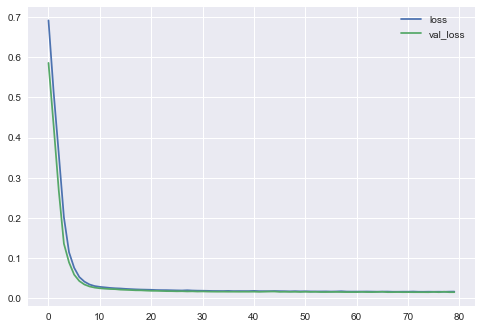

In [148]:
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label='val_loss')
plt.legend()

<p style="background:black">
<code style="background:black;color:white">Prediction
</code>
</p>

In [217]:
validation_target = Y[-N//2:] #second half of our labels
validation_predictions = [] #predictions which will be one by one filled in

last_x = X[-N//2] # 1-D array of length T, because my prediction is based on last 10 
#values! 

while len(validation_predictions) < len(validation_target):
    #we are predicting one by one ...495 predictions ..
    p = model.predict(last_x.reshape(1, -1, 1))[0,0] 
    #I guess reshaping has to be done - still have an issue with shapes..
    #simply put - it just take a 
    
    # update the predictions list
    validation_predictions.append(p) #appending our prediction until we reach len of 495
    #990/2
    
    # make the new input
    last_x = np.roll(last_x, -1)#this part just take last element and puts it to begining..
    last_x[-1] = p #so we have new p value for prediction
    
#Okay now i get it :), we are rolling only 10 pieces over and over again
#so last_x is only first 10 pieces - something like h0? ..And then our 10 pieces is
#just filled with predicted values

#BOTTOM LINE: code is doing exactly what theory says

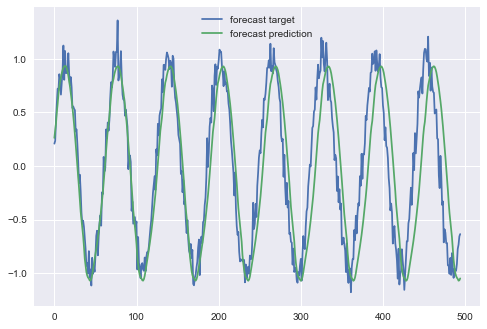

In [218]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

*So RNN perfoms better results than our Simple regression. Also code above is now with better explanation, now it's crystal clear!*

## Theory Part II +

<div class="alert alert-block alert-warning"><b>Theory bonus - shapes</b></div>

This is must know in DL!

- N = number of samples
- T = sequence length
- D = number of input feature
- M = number of hidden units
- K = nnumber of output units

*It would be good to expand this part in the future.*

<div class="alert alert-block alert-warning"><b>Theory bonus - counting number of parameters</b></div>

*Well I hate when is something unclear, and with this exercise I can get a better intuition about how many parameters I will create and therefore what could be the computational complexity.*

***1. ANN***

- i = input size
- h = size of hidden layer
- o = output size
- So for one hidden layer: (ixh + hxo) + (h+o)

Example 1.1 i = 3, h = 5, o = 2 or this picture:

![Loss](images\dl27.png)

*So number of parameters is equal to connections between layers and biases in every lays. Which is (3x5+5x2)+(5+2) and therefore* ***32***

In [233]:
# input = Input((None, 3)) = 3 input layers
# dense = Dense(5)(input) = 5 hidden layers
# output = Dense(2)(dense) = 2 layers
# model = Model(input, output)

Example 1.2 i = 50, h = 100,1,100, o = 50 or this picture:

![Loss](images\dl28.png)

- num_params = connections between layers + biases in every layer
- (50×100 + 100×1 + 1×100 + 100×50) + (100+1+100+50) = 10,451

In [234]:
# input = Input((None, 50))
# dense = Dense(100)(input)
# dense = Dense(1)(dense)
# dense = Dense(100)(dense)
# output = Dense(50)(dense)
# model = Model(input, output)

<div class="alert alert-block alert-info"><b>Note:</b> now it becomes much clearer why in CNN we need weighted weights</div>

***2.CNN***

*For one layer*

- number of input maps i
- filter size f
- o number of output maps 
- number of parameters = [i x (f x f) x o] + o

Example 3.1: Greyscale image with 2×2 filter, output 3 channels

![Loss](images\dl30.png)

- therefore i = 1, because we have only gray, f = 2 and o = 3
- => [1 × (2×2) × 3] + 3 = **15**

In [235]:
# input = Input((None, None, 1))
# conv2d = Conv2D(kernel_size=2, filters=3)(input)
# model = Model(input, conv2d)

Example 3.2: RGB image with 2×2 filter, output of 1 channel

![Loss](images\dl31.png)

- Therefore i = 3 (RGB), f = 2, o = 1
- => [3 × (2×2) × 1] + 1 = **13**

In [236]:
# input = Input((None, None, 3))
# conv2d = Conv2D(kernel_size=2, filters=1)(input)
# model = Model(input, conv2d)

#input = Input((None, None, 3))
#conv2d = Conv2D(kernel_size=2, filters=1)(input)
 model = Model(input, conv2d)

***3.RNNs***

![Loss](images\dl32.png)

In [292]:
# input = Input((None, 3))
# lstm = LSTM(2)(input)
# model = Model(input, lstm)

- g no. of FFNNs in a unit (RNN has 1, GRU has 3, LSTM has 4)
- size of hiiden units h
- i size of input
- num_params = g × [h(h+i) + h]

Example 2.1: LSTM with 2 hidden units and input dimension 3.

num_params = 4x [2(2+3)+2] = **48**

In [237]:
# input = Input((None, 3))
# lstm = LSTM(2)(input)
# model = Model(input, lstm)

## Theory Part III

<div class="alert alert-block alert-warning"><b>Modern RNN Units</b></div>

- LSTM (Long Short-Term Memory)
- GRU - Gated Recurrent Unit (simple version of LSTM)

*RNNs are vulnerable to the vanishing gradient problem, the further back an input x(t) is, the more its gradient vanishes. That is why simple RNN cannot learn from input which are too far back.*

<div class="alert alert-block alert-warning"><b>Gated Recurrent Unit (GRU)</b></div>

*This part will be a little heavier, so I will start with equations and proceed with graphic illustration.*

*Firsly equation for hidden state in Simple RNN.*

![\begin{equation*}
\ \ h_t= \sigma(W_{xh}^TX_t + W_{hh}^Th_{t-1}+b_h)
\end{equation*}](https://render.githubusercontent.com/render/math?math=%5Chuge+%5Ctextstyle+%5Cbegin%7Bequation%2A%7D%0A%5C+%5C+h_t%3D+%5Csigma%28W_%7Bxh%7D%5ETX_t+%2B+W_%7Bhh%7D%5ETh_%7Bt-1%7D%2Bb_h%29%0A%5Cend%7Bequation%2A%7D)

*GRU equation is composed from three parts. Reset gate vector r(t), update gate vector and hidden state.*

- all vector z(t), r(t), h(t)have the same size, size of M (size of hidden units)
- where M is hyperparameter aka number of features (so it is an optional value)
- weight going from x(t) is DxM (where D is number of inputs)
- weight going from h(t) is MxM
- all bias terms are of size M
- circle with a dot is element-wise multiplication (each element treated individually, basically numpy multiplication, matrices etc.)

![\begin{equation*}
\ \ z_t= \sigma(W_{xz}^TX_t + W_{hz}^Th_{t-1}+b_z)
\end{equation*}](https://render.githubusercontent.com/render/math?math=%5Chuge+%5Ctextstyle+%5Cbegin%7Bequation%2A%7D%0A%5C+%5C+z_t%3D+%5Csigma%28W_%7Bxz%7D%5ETX_t+%2B+W_%7Bhz%7D%5ETh_%7Bt-1%7D%2Bb_z%29%0A%5Cend%7Bequation%2A%7D)

![\begin{equation*}
\ \ r_t= \sigma(W_{xr}^TX_t + W_{hr}^Th_{t-1}+b_r)
\end{equation*}](https://render.githubusercontent.com/render/math?math=%5Chuge+%5Ctextstyle+%5Cbegin%7Bequation%2A%7D%0A%5C+%5C+r_t%3D+%5Csigma%28W_%7Bxr%7D%5ETX_t+%2B+W_%7Bhr%7D%5ETh_%7Bt-1%7D%2Bb_r%29%0A%5Cend%7Bequation%2A%7D)

*Simply put: we are calculating two values, well vectors which have same equation as our hidden state above, but insteatd of having xh and hh we have xz, xr and hz and hr. So we are just calculcating slightly different hidden  state...Also these are sigmoid values - values between 0 - 1. For now it is enough, let's continue with scary one...*

![\begin{equation*}
\ \ h_t=(1-z_t)\odot h_{t-1}+z_t\odot tanh(W_{xh}^Tx_t+W_{hh}^T(r_t\odot h_{t-1})+b_h)
\end{equation*}](https://render.githubusercontent.com/render/math?math=%5CLARGE+%5Ctextstyle+%5Cbegin%7Bequation%2A%7D%0A%5C+%5C+h_t%3D%281-z_t%29%5Codot+h_%7Bt-1%7D%2Bz_t%5Codot+tanh%28W_%7Bxh%7D%5ETx_t%2BW_%7Bhh%7D%5ET%28r_t%5Codot+h_%7Bt-1%7D%29%2Bb_h%29%0A%5Cend%7Bequation%2A%7D)

**First part:**

1. M size vector x M size vector => element wise multiplication, but simply put this first part  I just take **UPDATE vector** and multiply my **PREVIOUS HIDDEN STATE** - therefore I am getting some kind of **UPDATED previsou hidden state.** If z(t) is closer to 0 my hidden previous state will be almost identitcal to itself and vice versa, z(t) = 1, my previous hidden state would be also zero

![\begin{equation*}
\ (1-z_t)\odot h_{t-1}
\end{equation*}](https://render.githubusercontent.com/render/math?math=%5Chuge+%5Ctextstyle+%5Cbegin%7Bequation%2A%7D%0A%5C+%281-z_t%29%5Codot+h_%7Bt-1%7D%0A%5Cend%7Bequation%2A%7D)

**Second part:**

![\begin{equation*}
\ z_t\odot tanh(W_{xh}^Tx_t+W_{hh}^T(r_t\odot h_{t-1})+b_h)
\end{equation*}](https://render.githubusercontent.com/render/math?math=%5Chuge+%5Ctextstyle+%5Cbegin%7Bequation%2A%7D%0A%5C+z_t%5Codot+tanh%28W_%7Bxh%7D%5ETx_t%2BW_%7Bhh%7D%5ET%28r_t%5Codot+h_%7Bt-1%7D%29%2Bb_h%29%0A%5Cend%7Bequation%2A%7D)

2. Here we have the opposite, if z(t) is closer to 0, we will have a zero value and if z(t) will be closer to 1 we will have the maximum value.

*Let's ignore everyrthing in our equation and just focus on LEFT x RIGHT and z(t)*

- z(t) = 0.0001 then LEFT SIDE MAXIMU (previous hidden state) x RIGHT SIDE MINIMUM (new hidden state)
- z(t) = 0.9999 then LEFT SIDE MINIMUM x RIGHT SIDE MAXIMUM

*SIMPLY PUT : the size of update gate vector is telling us, how much our value will be updated or not, with high z(t) we will update our value more and vice versa. It is something like, do I have to remember old value and ignore new one or the opposite? Another interpretation is that it is just a logistic regression which classify whether to keep value or wheter to discard it*

**Third part**

*Now I will focus on reset factor and its purpose. Firstly a SimpleRNN, which is very similar to our right side, well almost identical. Here we can see two right sides of our equations but for now just ignore z(t), or lets assume that z(t) is equal to 1 and therefore left side is zero (we will completery forgot the previous value, and only new value will be important).*

![\begin{equation*}
\ W_{xh}^TX_t + W_{hh}^Th_{t-1}+b_h
\end{equation*}](https://render.githubusercontent.com/render/math?math=%5Chuge+%5Ctextstyle+%5Cbegin%7Bequation%2A%7D%0A%5C+W_%7Bxh%7D%5ETX_t+%2B+W_%7Bhh%7D%5ETh_%7Bt-1%7D%2Bb_h%0A%5Cend%7Bequation%2A%7D)

![\begin{equation*}
\ W_{xh}^Tx_t+W_{hh}^T(r_t\odot h_{t-1})+b_h
\end{equation*}](https://render.githubusercontent.com/render/math?math=%5Chuge+%5Ctextstyle+%5Cbegin%7Bequation%2A%7D%0A%5C+W_%7Bxh%7D%5ETx_t%2BW_%7Bhh%7D%5ET%28r_t%5Codot+h_%7Bt-1%7D%29%2Bb_h%0A%5Cend%7Bequation%2A%7D)

*We can see that we have the same logic, but now for W(hh), meaning that if r(t) is equal to 1 we will remember W(hh) and forgot if W(hh) is equal to 0.*

**The Reset gate is responsible for deciding which portions of the previous hidden state are to be combined with the current input to propose a new hidden state.**

**And the Update gate is responsible for determining how much of the previous hidden state is to be retained and what portion of the new proposed hidden state (derived from the Reset gate) is to be added to the final hidden state.**

<div class="alert alert-block alert-info"><b>Note:</b> well I could not found how is GRU calculating values for z(t), r(t) and also r and z values, but I guess tha main logic is whether it improved cost function or not, so it is trying to discard unnecessary information and keep only the useful ones</div>

<div class="alert alert-block alert-warning"><b>Long Short-Term Memory(LSTM)</b></div>

*Probably the best model for RNNs, GRU is a faster one but not so precise.*

![Loss](images\dl26.jpg)

*So we have visible differences from GRU here.*

- LSTM has two memories a short-term and long-term
- Also LSTM return two states - Hidden and Cell

*Picture below is self explanatory.*

![Loss](images\dl33.png)

**Equations**

1. Forgot gate

![\begin{equation*}
\ f(t) = \sigma (W_{xf}^TX_t + W_{hf}^Th_{t-1}+b_f)
\end{equation*}](https://render.githubusercontent.com/render/math?math=%5Chuge+%5Ctextstyle+%5Cbegin%7Bequation%2A%7D%0A%5C+f%28t%29+%3D+%5Csigma+%28W_%7Bxf%7D%5ETX_t+%2B+W_%7Bhf%7D%5ETh_%7Bt-1%7D%2Bb_f%29%0A%5Cend%7Bequation%2A%7D)

2. Input/update gate

![\begin{equation*}
\ i(t) = \sigma (W_{xi}^TX_t + W_{hi}^Th_{t-1}+b_i)
\end{equation*}](https://render.githubusercontent.com/render/math?math=%5Chuge+%5Ctextstyle+%5Cbegin%7Bequation%2A%7D%0A%5C+i%28t%29+%3D+%5Csigma+%28W_%7Bxi%7D%5ETX_t+%2B+W_%7Bhi%7D%5ETh_%7Bt-1%7D%2Bb_i%29%0A%5Cend%7Bequation%2A%7D)

3. Output gate

![\begin{equation*}
\ o(t) = \sigma (W_{xo}^TX_t + W_{ho}^Th_{t-1}+b_o)
\end{equation*}](https://render.githubusercontent.com/render/math?math=%5Chuge+%5Ctextstyle+%5Cbegin%7Bequation%2A%7D%0A%5C+o%28t%29+%3D+%5Csigma+%28W_%7Bxo%7D%5ETX_t+%2B+W_%7Bho%7D%5ETh_%7Bt-1%7D%2Bb_o%29%0A%5Cend%7Bequation%2A%7D)

4. Cell state

![\begin{equation*}
\ \ c_t=f_t \odot c_{t-1}+i_t \odot f_c(W_{xc}^Tx_t+W_{hc}^T h_{t-1}+b_c)
\end{equation*}](https://render.githubusercontent.com/render/math?math=%5CLARGE+%5Ctextstyle+%5Cbegin%7Bequation%2A%7D%0A%5C+%5C+c_t%3Df_t+%5Codot+c_%7Bt-1%7D%2Bi_t+%5Codot+f_c%28W_%7Bxc%7D%5ETx_t%2BW_%7Bhc%7D%5ET+h_%7Bt-1%7D%2Bb_c%29%0A%5Cend%7Bequation%2A%7D)

*So our first three equations are quite clear. Our cell state equation is a little different. Left side is just telling us how much of cell state should be forgotten and righ side is a simple RNN where i(t) is describing how it should be updated. One last note: we have activation function f(c) on our simple RNN and by default it is tanh function.* 

5. Hidden state

![\begin{equation*}
\ \ h_t=o_t \odot f_h(c_t)
\end{equation*}](https://render.githubusercontent.com/render/math?math=%5Chuge+%5Ctextstyle+%5Cbegin%7Bequation%2A%7D%0A%5C+%5C+h_t%3Do_t+%5Codot+f_h%28c_t%29%0A%5Cend%7Bequation%2A%7D)

*Our hidden state is just our cell state but "updated" again by our output gate.*

**Simply put: LSTM is very similar to GRU but with one more gate. Medium BAM**

## Coding Part III

<div class="alert alert-block alert-warning"><b>NonLinear Data with LSTM</b></div>

<p style="background:black">
<code style="background:black;color:white">Dependencies
</code>
</p>

In [250]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<p style="background:black">
<code style="background:black;color:white">Data
</code>
</p>

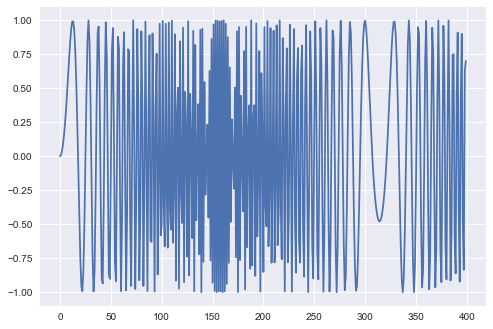

In [253]:
series = np.sin((0.1*np.arange(400))**2)
plt.plot(series)

In [254]:
T, D, X, Y = 10, 1, [], []

for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

X = np.array(X).reshape(-1, T) # make it N x T
Y = np.array(Y)
N = len(X)
X.shape, Y.shape

((390, 10), (390,))

<p style="background:black">
<code style="background:black;color:white">LSTM Model
</code>
</p>

In [257]:
X = X.reshape(-1, T, 1) # make it N x T x D

In [258]:
i = Input(shape=(T, D))
x = LSTM(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.05),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  batch_size=32,
  epochs=200,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Train on 195 samples, validate on 195 samples
Epoch 1/200
195/195 [==============================] - 3s 14ms/sample - loss: 0.5411 - val_loss: 0.5450
Epoch 2/200
195/195 [==============================] - 0s 317us/sample - loss: 0.5028 - val_loss: 0.5324
Epoch 3/200
195/195 [==============================] - 0s 276us/sample - loss: 0.4697 - val_loss: 0.5012
Epoch 4/200
195/195 [==============================] - 0s 281us/sample - loss: 0.3984 - val_loss: 0.4787
Epoch 5/200
195/195 [==============================] - 0s 343us/sample - loss: 0.3169 - val_loss: 0.6080
Epoch 6/200
195/195 [==============================] - 0s 332us/sample - loss: 0.2577 - val_loss: 0.3680
Epoch 7/200
195/195 [==============================] - 0s 312us/sample - loss: 0.2100 - val_loss: 0.3922
Epoch 8/200
195/195 [==============================] - 0s 281us/sample - loss: 0.1553 - val_loss: 0.3252
Epoch 9/200
195/195 [==============================] - 0s 245us/sample - loss: 0.1098 - val_loss: 0.2565
Epoch 10/2

Epoch 78/200
195/195 [==============================] - 0s 261us/sample - loss: 0.0036 - val_loss: 0.1108
Epoch 79/200
195/195 [==============================] - 0s 261us/sample - loss: 0.0045 - val_loss: 0.1022
Epoch 80/200
195/195 [==============================] - 0s 251us/sample - loss: 0.0043 - val_loss: 0.1113
Epoch 81/200
195/195 [==============================] - 0s 251us/sample - loss: 0.0038 - val_loss: 0.1075
Epoch 82/200
195/195 [==============================] - 0s 261us/sample - loss: 0.0046 - val_loss: 0.1076
Epoch 83/200
195/195 [==============================] - 0s 302us/sample - loss: 0.0034 - val_loss: 0.1142
Epoch 84/200
195/195 [==============================] - 0s 353us/sample - loss: 0.0048 - val_loss: 0.1045
Epoch 85/200
195/195 [==============================] - 0s 327us/sample - loss: 0.0034 - val_loss: 0.1042
Epoch 86/200
195/195 [==============================] - 0s 251us/sample - loss: 0.0032 - val_loss: 0.1012
Epoch 87/200
195/195 [========================

*It's really funny, how complicated is theory behind models and how simple is to implement them, at least at the basic user level.*

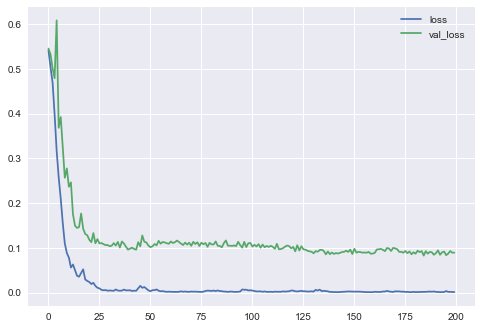

In [259]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

<p style="background:black">
<code style="background:black;color:white">Prediction
</code>
</p>

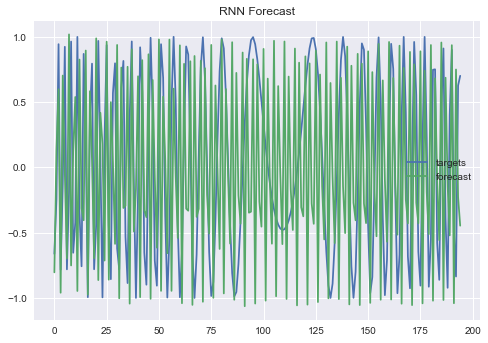

In [261]:
forecast = []
input_ = X[-N//2]
while len(forecast) < len(Y[-N//2:]):
    # Reshape the input_ to N x T x D
    f = model.predict(input_.reshape(1, T, 1))[0,0]
    forecast.append(f)
    
    # make a new input with the latest forecast
    input_ = np.roll(input_, -1)
    input_[-1] = f

plt.plot(Y[-N//2:], label='targets')
plt.plot(forecast, label='forecast')
plt.title("RNN Forecast")
plt.legend()

*So from the point of view of syntax complexity, we have just this change: x = LSTM(10)(i). I will proceed with another examples.*

<div class="alert alert-block alert-warning"><b>Starbucks prediction</b></div>

*It is just from pure curiosity. Firstly this model won't try to predict prices or something like that, but only if price can go up or down and even then it is quite a dumb approach, because we will be using only few features.*

<p style="background:black">
<code style="background:black;color:white">Data
</code>
</p>

In [265]:
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Dense, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [272]:
df = pd.read_csv("sbux.csv")

In [274]:
df['PrevClose'] = df['close'].shift(1) 

In [275]:
df['Return'] = (df['close'] - df['PrevClose']) / df['PrevClose']

In [276]:
df.head()

,date,open,high,low,close,volume,Name,PrevClose,Return
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


In [277]:
input_data = df[['open', 'high', 'low', 'close', 'volume']].values
targets = df['Return'].values

*Our shape*

In [278]:
T = 10 
D = input_data.shape[1]
N = len(input_data) - T

*Normalizing our data*

In [279]:
Ntrain = len(input_data) * 2 // 3
scaler = StandardScaler()
scaler.fit(input_data[:Ntrain + T - 1])
input_data = scaler.transform(input_data)

*X_train and Y_train*

In [280]:
X_train = np.zeros((Ntrain, T, D))
Y_train = np.zeros(Ntrain)

for t in range(Ntrain):
    X_train[t, :, :] = input_data[t:t+T]
    Y_train[t] = (targets[t+T] > 0)

*X_test and Y_test*

In [281]:
X_test = np.zeros((N - Ntrain, T, D))
Y_test = np.zeros(N - Ntrain)

for u in range(N - Ntrain):
    t = u + Ntrain
    X_test[u, :, :] = input_data[t:t+T]
    Y_test[u] = (targets[t+T] > 0)

<p style="background:black">
<code style="background:black;color:white">Model
</code>
</p>

In [282]:
i = Input(shape=(T, D))
x = LSTM(50)(i)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.001),
  metrics=['accuracy'],
)

In [283]:
result = model.fit(
  X_train, Y_train,
  batch_size=32,
  epochs=300,
  validation_data=(X_test, Y_test),
)

Train on 839 samples, validate on 410 samples
Epoch 1/300
839/839 [==============================] - 3s 3ms/sample - loss: 0.6980 - accuracy: 0.4946 - val_loss: 0.6963 - val_accuracy: 0.4902
Epoch 2/300
839/839 [==============================] - 0s 204us/sample - loss: 0.6929 - accuracy: 0.5232 - val_loss: 0.6957 - val_accuracy: 0.4878
Epoch 3/300
839/839 [==============================] - 0s 352us/sample - loss: 0.6919 - accuracy: 0.5209 - val_loss: 0.6948 - val_accuracy: 0.4878
Epoch 4/300
839/839 [==============================] - 0s 317us/sample - loss: 0.6915 - accuracy: 0.5197 - val_loss: 0.6927 - val_accuracy: 0.5098
Epoch 5/300
839/839 [==============================] - 0s 282us/sample - loss: 0.6914 - accuracy: 0.5268 - val_loss: 0.6931 - val_accuracy: 0.4927
Epoch 6/300
839/839 [==============================] - 0s 256us/sample - loss: 0.6911 - accuracy: 0.5256 - val_loss: 0.6903 - val_accuracy: 0.5415
Epoch 7/300
839/839 [==============================] - 0s 229us/sample - l

839/839 [==============================] - 0s 197us/sample - loss: 0.5647 - accuracy: 0.6949 - val_loss: 0.7533 - val_accuracy: 0.4805
Epoch 112/300
839/839 [==============================] - 0s 202us/sample - loss: 0.5585 - accuracy: 0.6865 - val_loss: 0.7598 - val_accuracy: 0.4707
Epoch 113/300
839/839 [==============================] - 0s 201us/sample - loss: 0.5593 - accuracy: 0.7020 - val_loss: 0.7707 - val_accuracy: 0.4805
Epoch 114/300
839/839 [==============================] - ETA: 0s - loss: 0.5565 - accuracy: 0.69 - 0s 215us/sample - loss: 0.5618 - accuracy: 0.6889 - val_loss: 0.7725 - val_accuracy: 0.4829
Epoch 115/300
839/839 [==============================] - 0s 197us/sample - loss: 0.5534 - accuracy: 0.6865 - val_loss: 0.7721 - val_accuracy: 0.4707
Epoch 116/300
839/839 [==============================] - 0s 199us/sample - loss: 0.5560 - accuracy: 0.6996 - val_loss: 0.7694 - val_accuracy: 0.4756
Epoch 117/300
839/839 [==============================] - 0s 196us/sample - los

839/839 [==============================] - 0s 202us/sample - loss: 0.3043 - accuracy: 0.8617 - val_loss: 1.0454 - val_accuracy: 0.4683
Epoch 221/300
839/839 [==============================] - 0s 204us/sample - loss: 0.2929 - accuracy: 0.8605 - val_loss: 1.0534 - val_accuracy: 0.4707
Epoch 222/300
839/839 [==============================] - 0s 222us/sample - loss: 0.2869 - accuracy: 0.8653 - val_loss: 1.0384 - val_accuracy: 0.4927
Epoch 223/300
839/839 [==============================] - 0s 202us/sample - loss: 0.2812 - accuracy: 0.8760 - val_loss: 1.0495 - val_accuracy: 0.4902
Epoch 224/300
839/839 [==============================] - 0s 315us/sample - loss: 0.2858 - accuracy: 0.8629 - val_loss: 1.0602 - val_accuracy: 0.4927
Epoch 225/300
839/839 [==============================] - 0s 238us/sample - loss: 0.2872 - accuracy: 0.8677 - val_loss: 1.0431 - val_accuracy: 0.4805
Epoch 226/300
839/839 [==============================] - 0s 225us/sample - loss: 0.2834 - accuracy: 0.8725 - val_loss: 1

839/839 [==============================] - 0s 223us/sample - loss: 0.1899 - accuracy: 0.9225 - val_loss: 1.3096 - val_accuracy: 0.4829
Epoch 276/300
839/839 [==============================] - 0s 193us/sample - loss: 0.1872 - accuracy: 0.9273 - val_loss: 1.3091 - val_accuracy: 0.5268
Epoch 277/300
839/839 [==============================] - 0s 188us/sample - loss: 0.1951 - accuracy: 0.9118 - val_loss: 1.2898 - val_accuracy: 0.5122
Epoch 278/300
839/839 [==============================] - 0s 190us/sample - loss: 0.2061 - accuracy: 0.9046 - val_loss: 1.3451 - val_accuracy: 0.4927
Epoch 279/300
839/839 [==============================] - 0s 214us/sample - loss: 0.1888 - accuracy: 0.9261 - val_loss: 1.2985 - val_accuracy: 0.5024
Epoch 280/300
839/839 [==============================] - 0s 206us/sample - loss: 0.1959 - accuracy: 0.9178 - val_loss: 1.2969 - val_accuracy: 0.5049
Epoch 281/300
839/839 [==============================] - 0s 188us/sample - loss: 0.1901 - accuracy: 0.9178 - val_loss: 1

(<matplotlib.legend.Legend at 0x11c93a77d48>,
 <matplotlib.legend.Legend at 0x11c93a84148>)

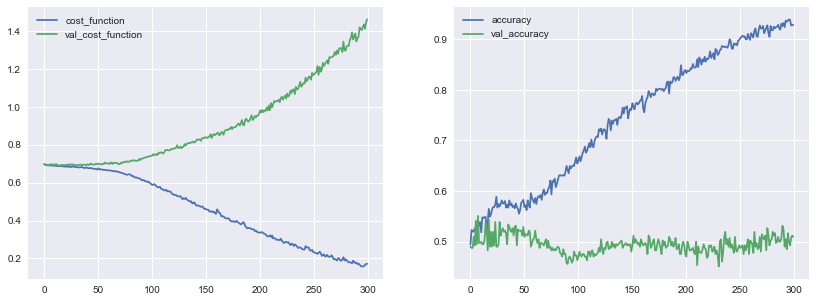

In [288]:
plt.style.use('seaborn')
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(14,5))
axs[0].plot(result.history['loss'], label='cost_function')
axs[0].plot(result.history['val_loss'], label='val_cost_function')
axs[1].plot(result.history['accuracy'], label='accuracy')
axs[1].plot(result.history['val_accuracy'], label='val_accuracy')
axs[0].legend(), axs[1].legend()

<p style="background:black">
<code style="background:black;color:white">val_accuracy: 0.5098 :))
</code>
</p>

*So our simple classifier is 1% better than having **Bulls** moode all the time. For forecasting stock prices we have to choose a different approach and building much, much, much bigger models. Using news, tweets, probably some pattern finder and use some price action knowledge and even then it probably wont be effective. But what about signal classifiers? Meaning combining Trading strategy and use LSTM as another decision factor, where we have multiple conditions that must be met and then we can enter the trade? This final idea is very interesting because price actions and indicators signal are not always clear and LSTM could help with final decision.*

***The End***